In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [3]:
file_path = '../data/benin-malanville.csv'

In [4]:
data= pd.read_csv(file_path)
df = pd.DataFrame(data)

In [5]:
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [6]:
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
print(df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

Missing values in each column


In [9]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


DataFrame information

In [10]:
print("\nDataFrame information:")
print(df.info())


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB

Drop the 'Comments' column

In [11]:
df = df.drop(columns=['Comments'])

print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


Count negative values

In [12]:
count_negative_ghi = (df['GHI'] < 0).sum()
count_negative_dni = (df['DNI'] < 0).sum()
count_negative_dhi = (df['DHI'] < 0).sum()
print(f"Number of negative GHI values: {count_negative_ghi}")
print(f"Number of negative DNI values: {count_negative_dni}")
print(f"Number of negative DHI values: {count_negative_dhi}")



Number of negative GHI values: 258847
Number of negative DNI values: 275987
Number of negative DHI values: 259182


Handling Negative Value

In [13]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])


night_mask = (df['Timestamp'].dt.hour >= 20) | (df['Timestamp'].dt.hour < 6)


df.loc[night_mask, 'GHI'] = df.loc[night_mask, 'GHI'].clip(lower=0)
df.loc[night_mask, 'DNI'] = df.loc[night_mask, 'DNI'].clip(lower=0)
df.loc[night_mask, 'DHI'] = df.loc[night_mask, 'DHI'].clip(lower=0)


daytime_mask = ~night_mask


df.loc[daytime_mask, 'GHI'] = df.loc[daytime_mask, 'GHI'].apply(lambda x: abs(x) if x < 0 else x)
df.loc[daytime_mask, 'DNI'] = df.loc[daytime_mask, 'DNI'].apply(lambda x: abs(x) if x < 0 else x)
df.loc[daytime_mask, 'DHI'] = df.loc[daytime_mask, 'DHI'].apply(lambda x: abs(x) if x < 0 else x)


print(f"Remaining negative values in GHI: {(df['GHI'] < 0).sum()}")
print(f"Remaining negative values in DNI: {(df['DNI'] < 0).sum()}")
print(f"Remaining negative values in DHI: {(df['DHI'] < 0).sum()}")


Remaining negative values in GHI: 0
Remaining negative values in DNI: 0
Remaining negative values in DHI: 0


In [14]:
print(df.describe())

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     242.205679     167.503952   
min              2021-08-09 00:01:00       0.000000       0.000000   
25%              2021-11-08 06:00:45       0.000000       0.000000   
50%              2022-02-07 12:00:30       6.000000       0.500000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     329.922395     261.507866   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      117.291487     236.589496     228.883576      28.179683   
min         0.000000       0.000000       0.000000      11.000000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         7.300000    

Detect Outliers

In [15]:


all_columns = ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
               'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 
               'Precipitation', 'TModA', 'TModB']


numeric_columns = [col for col in all_columns if pd.api.types.is_numeric_dtype(df[col])]


outlier_counts_z = {}
outlier_counts_iqr = {}


for column in numeric_columns:
    
    mean = df[column].mean()
    std_dev = df[column].std()
    z_scores = (df[column] - mean) / std_dev
    outlier_counts_z[column] = (z_scores.abs() > 3).sum()  # Count of outliers based on Z-score

   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_counts_iqr[column] = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()  # Count of outliers based on IQR


outlier_summary = pd.DataFrame({
    'Column': numeric_columns,
    'Z-Score Outliers': [outlier_counts_z.get(col, 0) for col in numeric_columns],
    'IQR Outliers': [outlier_counts_iqr.get(col, 0) for col in numeric_columns]
})

print(outlier_summary)


           Column  Z-Score Outliers  IQR Outliers
0             GHI                93           158
1             DNI                 2         15338
2             DHI              3912          9169
3            ModA                27            98
4            ModB                63           240
5            Tamb                 0           222
6              RH                 0             0
7              WS              3109          6717
8          WSgust              3500          5368
9         WSstdev              5653        107372
10             WD                 0             0
11        WDstdev              4765          7251
12             BP               865         10288
13       Cleaning               485           485
14  Precipitation              1402          3789
15          TModA                10             1
16          TModB                98           257


Handle Outliers

In [16]:



print("Available columns in the DataFrame:")
print(df.columns)

all_columns = ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
               'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 
               'Precipitation', 'TModA', 'TModB']


numeric_columns = [col for col in all_columns if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]


columns_to_cap = [col for col in ['DNI', 'DHI', 'WS', 'WSgust', 'WSstdev', 'WDstdev', 'Precipitation'] if col in numeric_columns]

lower_cap = df[columns_to_cap].quantile(0.01)
upper_cap = df[columns_to_cap].quantile(0.99)

df[columns_to_cap] = df[columns_to_cap].clip(lower=lower_cap, upper=upper_cap, axis=1)
columns_to_impute = [col for col in ['WSstdev', 'BP', 'Cleaning', 'Precipitation'] if col in numeric_columns]


for column in columns_to_impute:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    df.loc[outliers, column] = df[column].median()


columns_to_remove_outliers = [col for col in ['ModA', 'ModB', 'Tamb', 'TModA', 'TModB'] if col in numeric_columns]


for column in columns_to_remove_outliers:
    mean = df[column].mean()
    std_dev = df[column].std()
    z_scores = (df[column] - mean) / std_dev
    df = df[(z_scores.abs() <= 3)]




Available columns in the DataFrame:
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


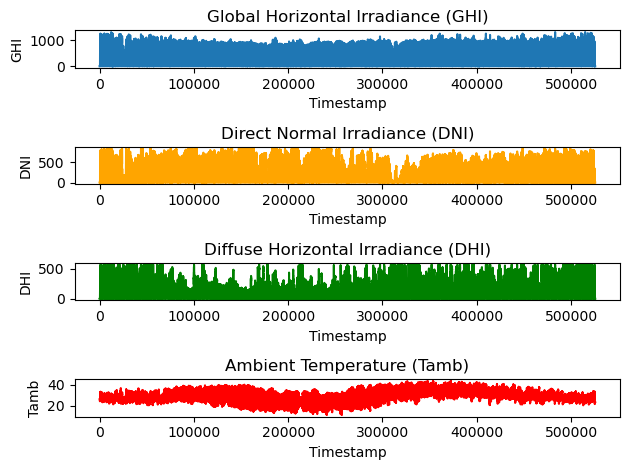

In [17]:

def plot_time_series(daf):

 df.set_index('Timestamp', inplace=True)
 print(df['Timestamp'])
 plt.figure(figsize=(12, 8))

# Plot GHI
plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI')
plt.title('Global Horizontal Irradiance (GHI)')
plt.xlabel('Timestamp')
plt.ylabel('GHI')

# Plot DNI
plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='orange')
plt.title('Direct Normal Irradiance (DNI)')
plt.xlabel('Timestamp')
plt.ylabel('DNI')

# Plot DHI
plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Timestamp')
plt.ylabel('DHI')

# Plot Tamb
plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.title('Ambient Temperature (Tamb)')
plt.xlabel('Timestamp')
plt.ylabel('Tamb')

plt.tight_layout()
plt.show()

In [18]:

columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
df_corr = df[columns_of_interest]
corr_matrix = df_corr.corr()
print(corr_matrix)


            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.882426  0.850524  0.919708  0.873821
DNI    0.882426  1.000000  0.548581  0.790336  0.756092
DHI    0.850524  0.548581  1.000000  0.825680  0.778738
TModA  0.919708  0.790336  0.825680  1.000000  0.983424
TModB  0.873821  0.756092  0.778738  0.983424  1.000000


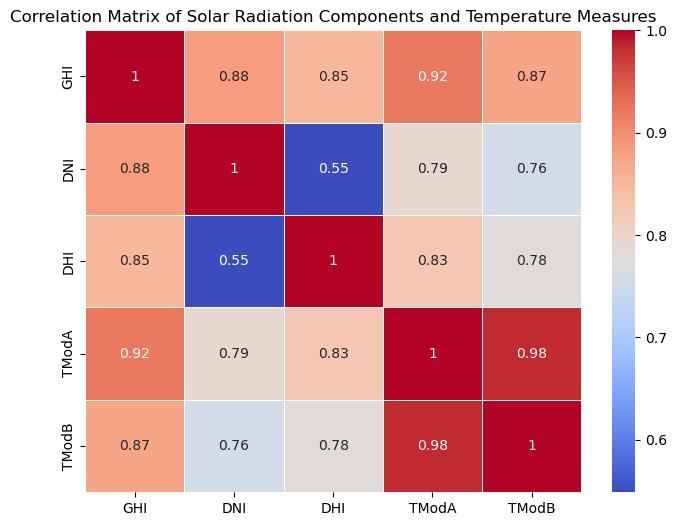

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation Components and Temperature Measures')
plt.show()


In [20]:

wind_columns = ['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']
df_wind = df[wind_columns]

print(df_wind.describe())



                  WS         WSgust        WSstdev             WD  \
count  525430.000000  525430.000000  525430.000000  525430.000000   
mean        2.109046       2.793108       0.492960     153.429396   
std         1.557102       1.965982       0.125064     102.333383   
min         0.000000       0.000000       0.200000       0.000000   
25%         1.000000       1.300000       0.400000      59.000000   
50%         1.900000       2.600000       0.500000     181.000000   
75%         3.100000       4.100000       0.500000     235.100000   
max         6.500000       8.400000       0.800000     360.000000   

             WDstdev  
count  525430.000000  
mean        8.506903  
std         6.061421  
min         0.000000  
25%         3.700000  
50%         8.600000  
75%        12.300000  
max        27.200000  


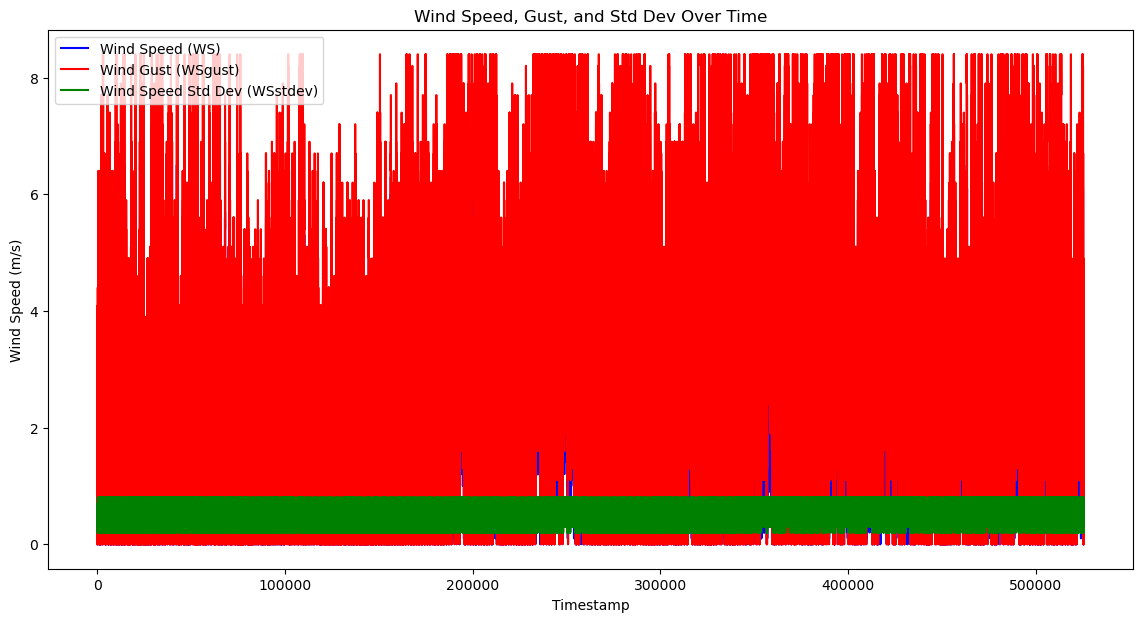

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['WS'], label='Wind Speed (WS)', color='blue')
plt.plot(df.index, df['WSgust'], label='Wind Gust (WSgust)', color='red')
plt.plot(df.index, df['WSstdev'], label='Wind Speed Std Dev (WSstdev)', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed, Gust, and Std Dev Over Time')
plt.legend()
plt.show()


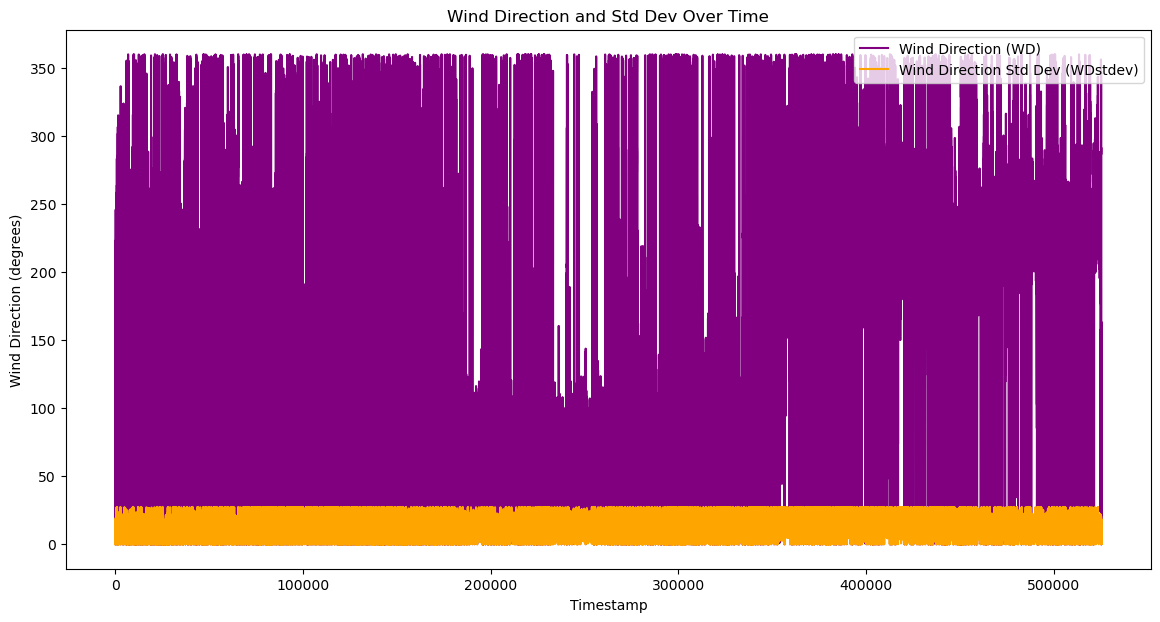

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['WD'], label='Wind Direction (WD)', color='purple')
plt.plot(df.index, df['WDstdev'], label='Wind Direction Std Dev (WDstdev)', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Wind Direction (degrees)')
plt.title('Wind Direction and Std Dev Over Time')
plt.legend()
plt.show()


               WS    WSgust   WSstdev        WD   WDstdev
WS       1.000000  0.984487  0.382973  0.248359  0.563023
WSgust   0.984487  1.000000  0.432224  0.268671  0.613912
WSstdev  0.382973  0.432224  1.000000  0.011538  0.378423
WD       0.248359  0.268671  0.011538  1.000000  0.312772
WDstdev  0.563023  0.613912  0.378423  0.312772  1.000000


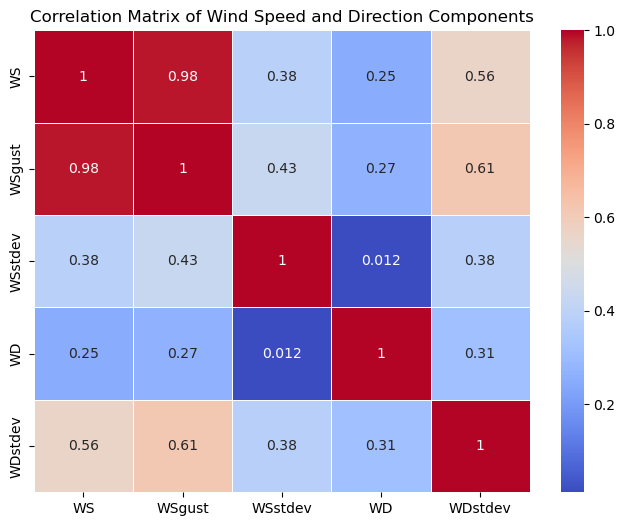

In [23]:
wind_corr_matrix = df_wind.corr()
print(wind_corr_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(wind_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Wind Speed and Direction Components')
plt.show()


In [24]:

temperature_columns = ['Tamb', 'TModA', 'TModB']
df_temp = df[temperature_columns]
print(df_temp.describe())


                Tamb          TModA          TModB
count  525430.000000  525430.000000  525430.000000
mean       28.177835      35.234304      32.461511
std         5.924110      14.794736      12.336692
min        11.000000       9.000000       8.100000
25%        24.200000      24.200000      23.600000
50%        28.000000      30.000000      28.900000
75%        32.300000      46.900000      41.500000
max        43.800000      79.600000      69.500000


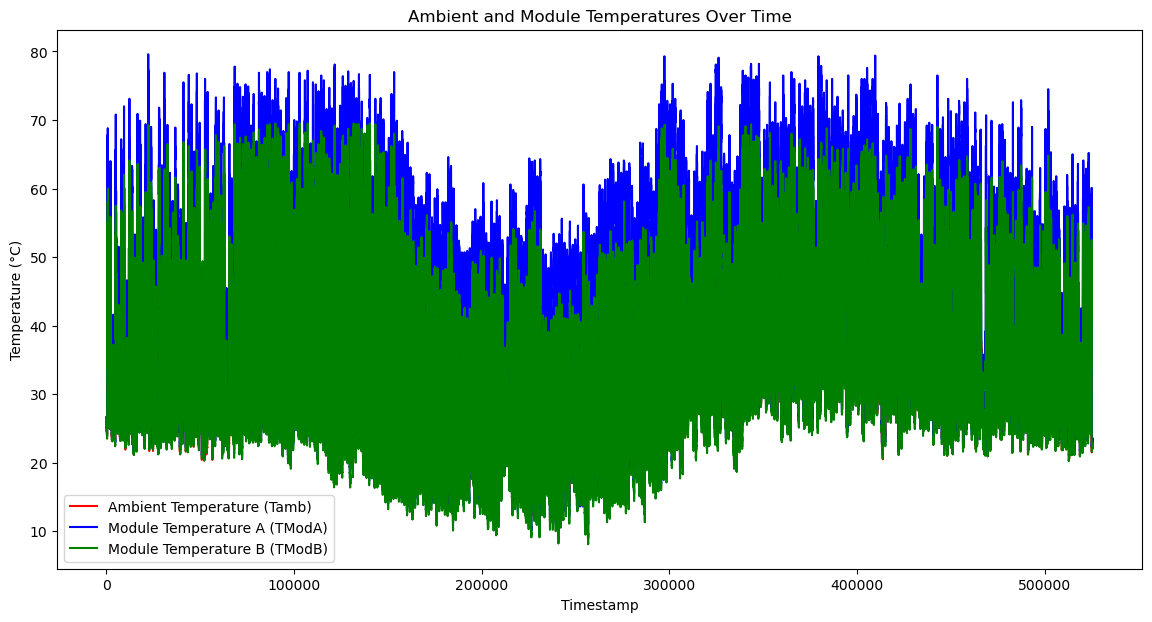

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Tamb'], label='Ambient Temperature (Tamb)', color='red')
plt.plot(df.index, df['TModA'], label='Module Temperature A (TModA)', color='blue')
plt.plot(df.index, df['TModB'], label='Module Temperature B (TModB)', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Ambient and Module Temperatures Over Time')
plt.legend()
plt.show()


C:\Users\teeyob\AppData\Local\Temp\ipykernel_9820\2469855960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['TModA_Tamb_diff'] = df['TModA'] - df['Tamb']
C:\Users\teeyob\AppData\Local\Temp\ipykernel_9820\2469855960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['TModB_Tamb_diff'] = df['TModB'] - df['Tamb']


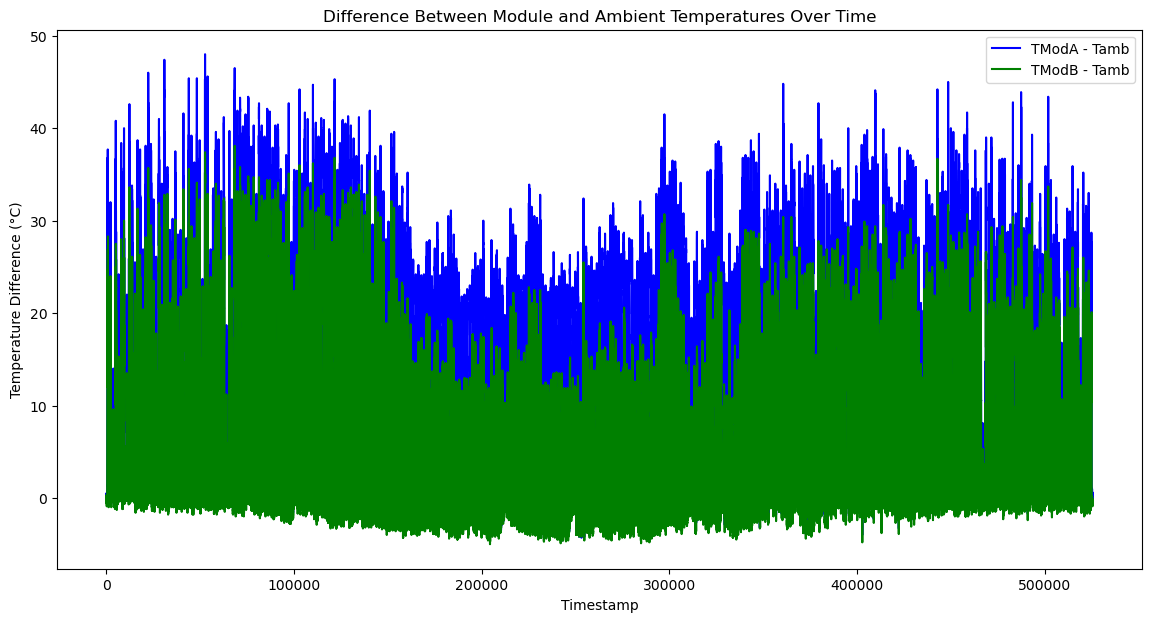

In [26]:
df_temp['TModA_Tamb_diff'] = df['TModA'] - df['Tamb']
df_temp['TModB_Tamb_diff'] = df['TModB'] - df['Tamb']

plt.figure(figsize=(14, 7))
plt.plot(df.index, df_temp['TModA_Tamb_diff'], label='TModA - Tamb', color='blue')
plt.plot(df.index, df_temp['TModB_Tamb_diff'], label='TModB - Tamb', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Temperature Difference (°C)')
plt.title('Difference Between Module and Ambient Temperatures Over Time')
plt.legend()
plt.show()


Visualize the correlation matrix
                     Tamb     TModA     TModB  TModA_Tamb_diff  \
Tamb             1.000000  0.761794  0.823556         0.487161   
TModA            0.761794  1.000000  0.983424         0.936865   
TModB            0.823556  0.983424  1.000000         0.881180   
TModA_Tamb_diff  0.487161  0.936865  0.881180         1.000000   
TModB_Tamb_diff  0.517833  0.931454  0.911724         0.976149   

                 TModB_Tamb_diff  
Tamb                    0.517833  
TModA                   0.931454  
TModB                   0.911724  
TModA_Tamb_diff         0.976149  
TModB_Tamb_diff         1.000000  


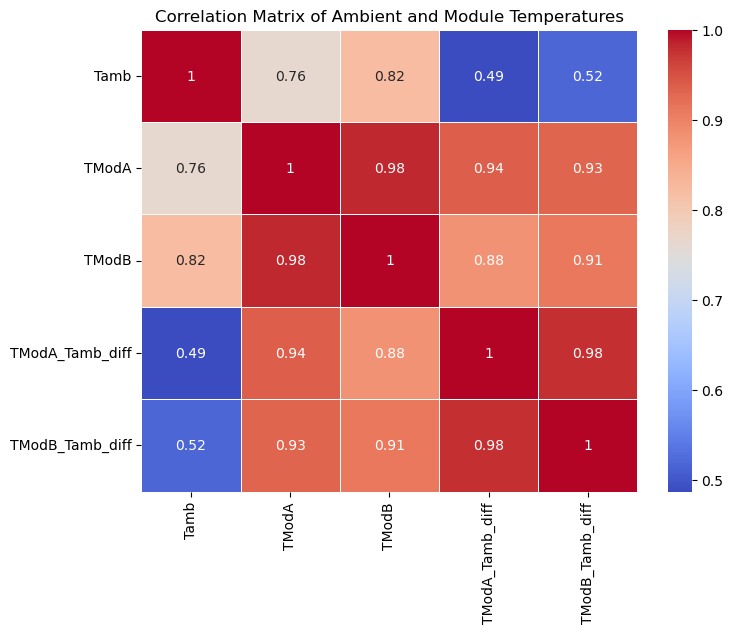

In [27]:
temp_corr_matrix = df_temp.corr()
print("Visualize the correlation matrix")
print(temp_corr_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(temp_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Ambient and Module Temperatures')
plt.show()


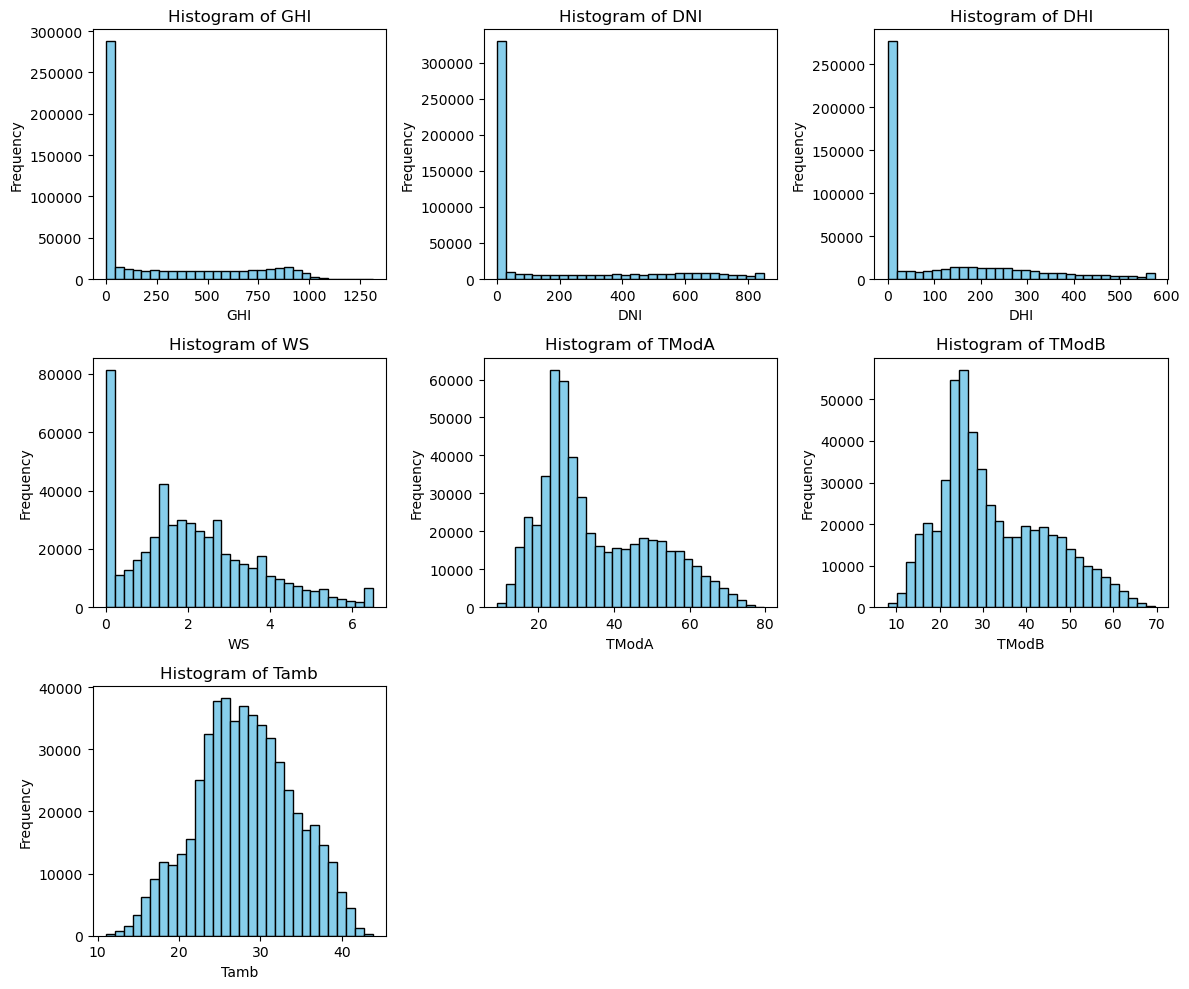

In [28]:


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(columns=['Comments'], errors='ignore')
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb']
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i+1)  
    df[column].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


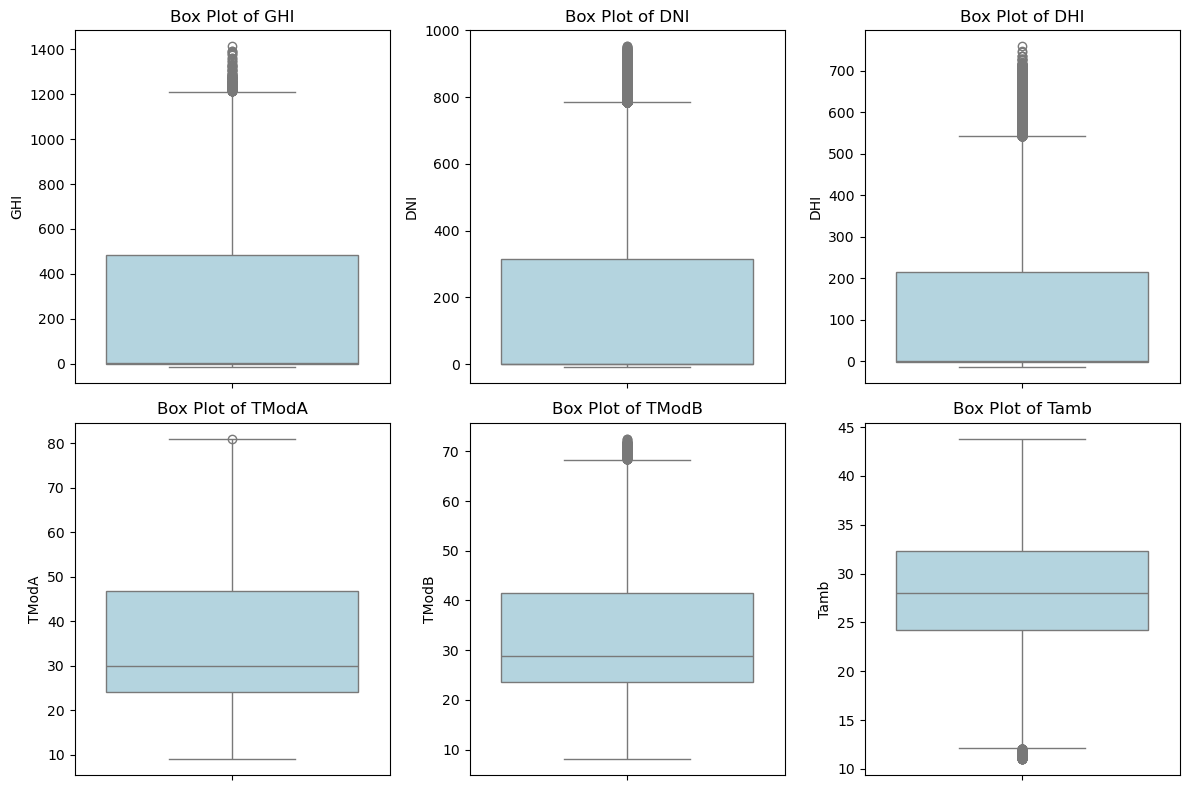

In [29]:




data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(columns=['Comments'], errors='ignore')
columns_to_plot = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb']
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i+1)  
    sns.boxplot(y=df[column], color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


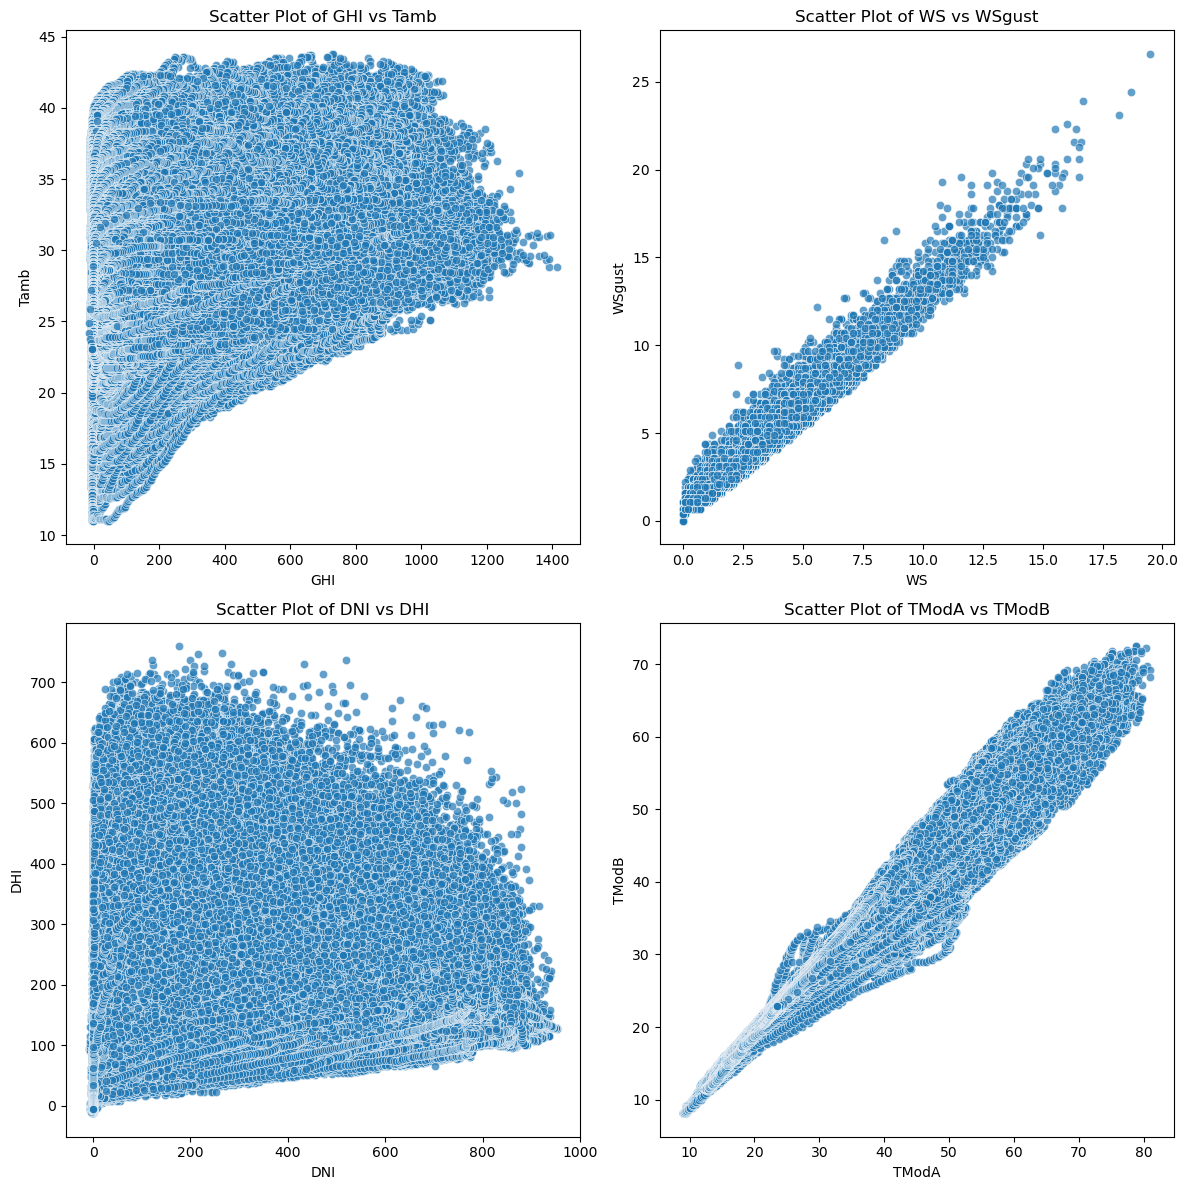

In [30]:

data = pd.read_csv(file_path)
df = pd.DataFrame(data)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(columns=['Comments'], errors='ignore')
scatter_pairs = [
    ('GHI', 'Tamb'),  
    ('WS', 'WSgust'), 
    ('DNI', 'DHI'),   
    ('TModA', 'TModB')
]
plt.figure(figsize=(12, 12))
for i, (x_var, y_var) in enumerate(scatter_pairs):
    plt.subplot(2, 2, i+1) 
    sns.scatterplot(x=df[x_var], y=df[y_var], alpha=0.7)
    plt.title(f'Scatter Plot of {x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()
